In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

In [2]:
import csv
from textblob import TextBlob

In [30]:
# Read comments from the CSV file with the correct encoding
comments = []
sentiments = []
weight = []
dic = []

In [31]:
with open('final_facebook_comments1.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row[2])  # Assuming the comments are in the first column

In [32]:
comments = comments[1:]
comments

['.this is for karnataka election people are fed up of u',
 'Great announcement  , Proud of our Prime Minister.',
 '25 din mai paisa double When modi will flee with all money',
 "Modi's eyes are now on women's savings",
 'Indian mainstream media channels are backbone of Bjp and RSS',
 'But Jammu and Kashmir Bank is giving same interest without any codal formalities....',
 'Good news',
 'After this PM Modi will give the money collected from the women to Andani',
 "It's for those women who have rich husband s",
 'Tell me what you want to do',
 'Good news',
 'Your Gar May Karak (Four Safety Boot, Post Office Safe.',
 'Only vote bank',
 'Very good',
 'This is absolutely wrong information there is no such scheme',
 'West Bengal Climpong',
 'Really good',
 'Adani Similar Saving Certificate',
 'Thanks modi ji',
 'very good',
 'How to make Modi in the account with 15 lakhs',
 'Modi ji na to sara paisa to tack ma La jatta ha korn si savings wala ho gya saving wala jb sa aya din aya t t t ta sav

In [33]:
# Perform sentiment analysis on each comment
for comment in comments:
    # Create a TextBlob object
    blob = TextBlob(comment)

    # Perform sentiment analysis
    sentiment = blob.sentiment.polarity

    # Interpret the sentiment polarity
    if sentiment > 0:
        sentiment_label = 'Positive'
    elif sentiment < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    sentiments.append(sentiment_label)
    weight.append(sentiment)
    dic.append((comment,sentiment_label))
    # Print the comment and its sentiment
    print('Comment:', comment)
    print('Sentiment:', sentiment_label)
    print('---')

Comment: .this is for karnataka election people are fed up of u
Sentiment: Neutral
---
Comment: Great announcement  , Proud of our Prime Minister.
Sentiment: Positive
---
Comment: 25 din mai paisa double When modi will flee with all money
Sentiment: Neutral
---
Comment: Modi's eyes are now on women's savings
Sentiment: Neutral
---
Comment: Indian mainstream media channels are backbone of Bjp and RSS
Sentiment: Neutral
---
Comment: But Jammu and Kashmir Bank is giving same interest without any codal formalities....
Sentiment: Neutral
---
Comment: Good news
Sentiment: Positive
---
Comment: After this PM Modi will give the money collected from the women to Andani
Sentiment: Neutral
---
Comment: It's for those women who have rich husband s
Sentiment: Positive
---
Comment: Tell me what you want to do
Sentiment: Neutral
---
Comment: Good news
Sentiment: Positive
---
Comment: Your Gar May Karak (Four Safety Boot, Post Office Safe.
Sentiment: Positive
---
Comment: Only vote bank
Sentiment: Neu

In [34]:
import pandas as pd
df = pd.DataFrame(dic,columns = ['comment','sentiment'])

In [35]:
df

,comment,sentiment
0,.this is for karnataka election people are fed...,Neutral
1,"Great announcement , Proud of our Prime Minis...",Positive
2,25 din mai paisa double When modi will flee wi...,Neutral
3,Modi's eyes are now on women's savings,Neutral
4,Indian mainstream media channels are backbone ...,Neutral
...,...,...
547,Just do the bus,Neutral
548,Modi ji started trying to take votes by foolin...,Negative
549,Modi is making money for election,Neutral
550,Modiri III II II II ISSSSME to FODAA,Neutral


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

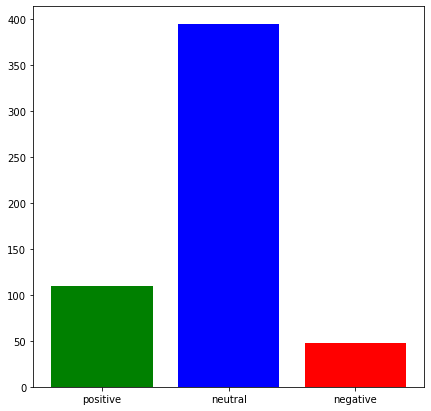

In [37]:
plt.figure(figsize = (7,7))
plt.bar(range(3),[len(df[df["sentiment"]=="Positive"]),len(df[df["sentiment"]=="Neutral"]),len(df[df["sentiment"]=="Negative"])],color = ['g','b','r'])
plt.xticks(range(3),["positive","neutral",'negative'])
plt.show()

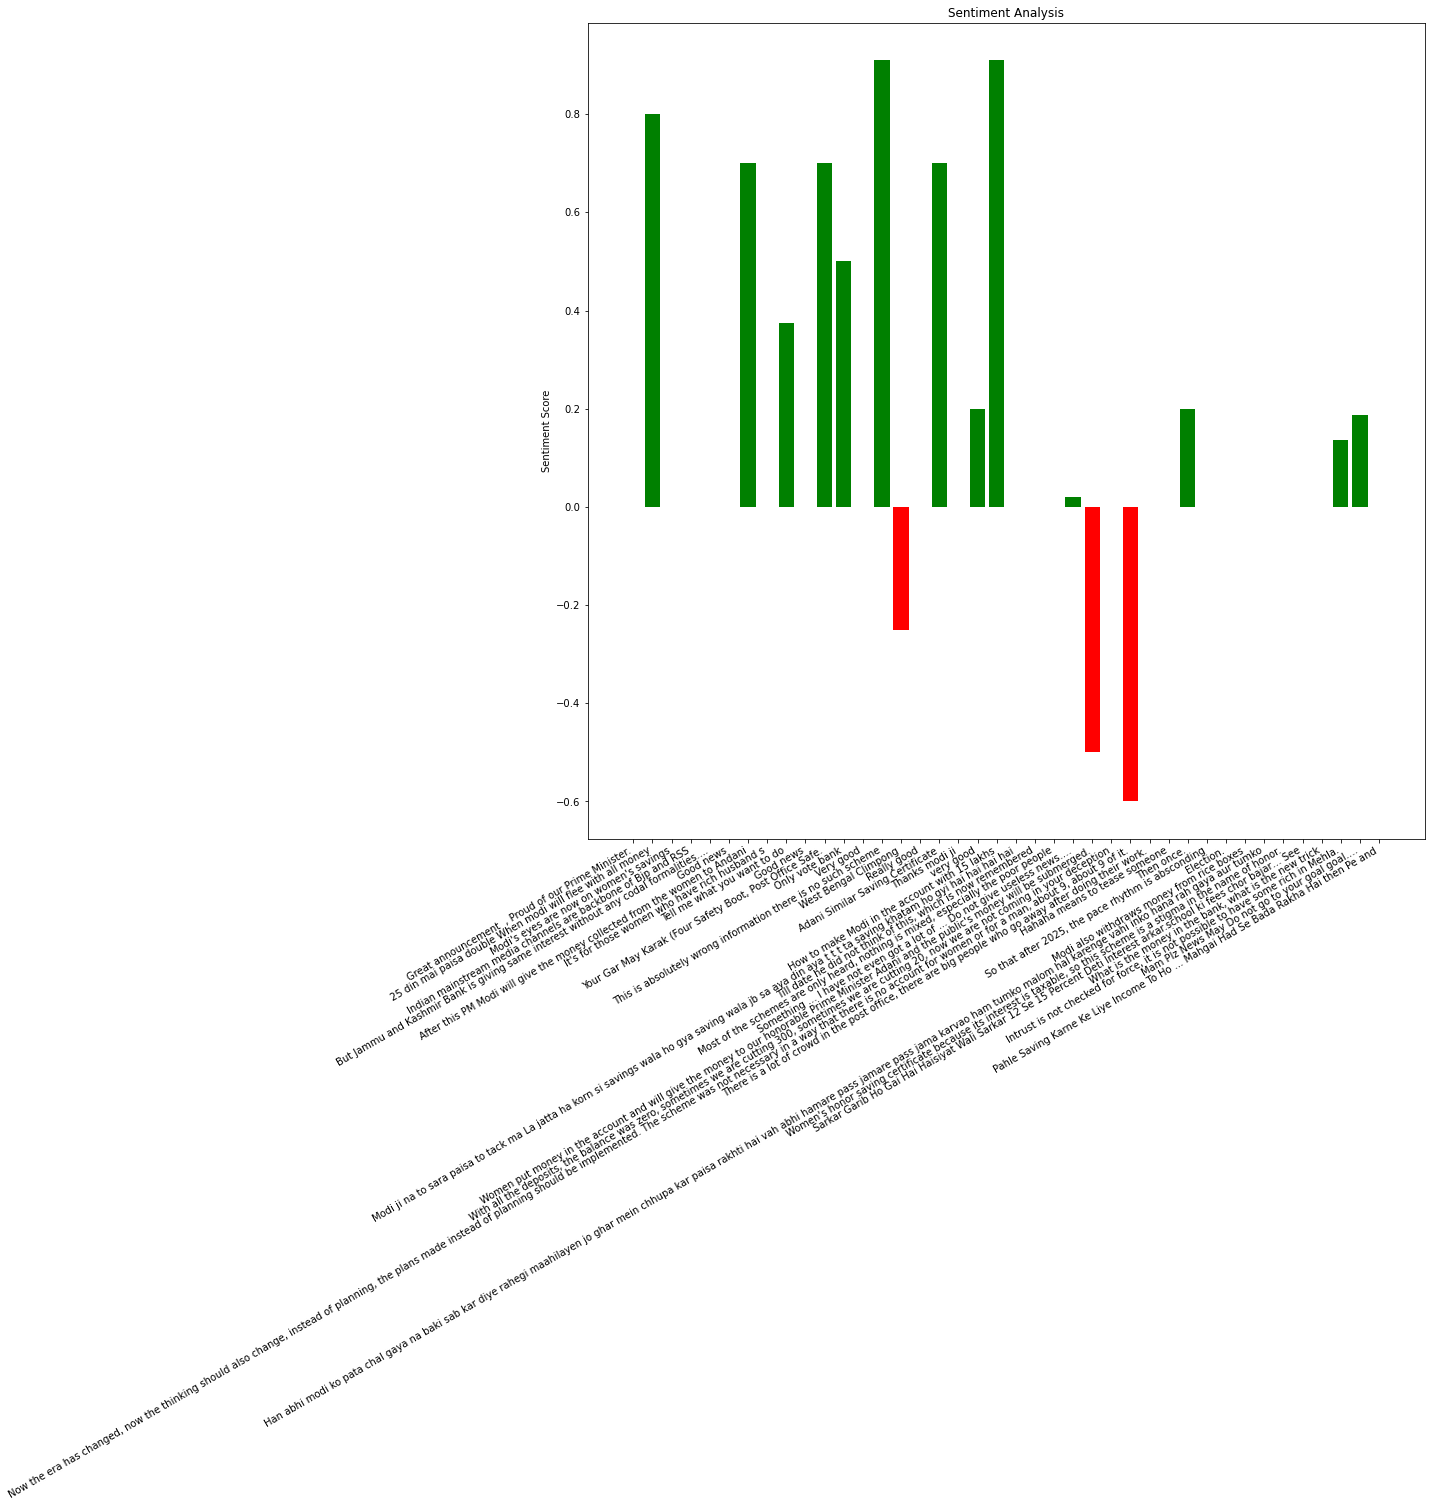

In [39]:
plt.figure(figsize = (15,15))
plt.bar(range(40), weight[:40], color=['g' if s == "Positive" else 'r' for s in sentiments])
plt.xticks(range(40), df['comment'][1:41], rotation=30, ha='right')
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis")
plt.show()